In [10]:
import pandas as pd

data = pd.read_pickle('combined_df.pkl')
data

,graph,index,mu,s,Js,Hill,sackin,mean_coalescence_time,amp,acc,ConnectivityIndex,AlgebraicConnectivity
0,pa,1,0.001,0.1,0.000233,1.085766,68.794408,1.16770,0.971043,0.762193,0.0,0.000000
1,pa,2,0.001,0.1,0.000229,1.085674,72.209340,1.09025,0.906141,0.799076,2.0,0.556971
2,pa,3,0.001,0.1,0.000227,1.081703,70.585114,1.09475,0.983525,0.748963,3.0,1.269001
3,pa,4,0.001,0.1,0.000223,1.080297,75.577822,1.03860,0.923615,0.786613,4.0,2.103527
4,pa,5,0.001,0.1,0.000224,1.080507,72.608354,1.16805,1.045931,0.805082,5.0,2.841214
...,...,...,...,...,...,...,...,...,...,...,...,...
280,bn,5,0.001,0.1,0.000265,1.105629,67.215759,1.47990,0.993510,0.788750,5.0,0.024320
281,bn,6,0.001,0.1,0.000263,1.092483,67.034074,1.33390,1.068397,0.813978,5.0,0.037964
282,bn,7,0.001,0.1,0.000253,1.089900,67.173369,1.13520,0.991013,0.806132,5.0,0.076205
283,bn,8,0.001,0.1,0.000244,1.087612,66.916265,1.11840,0.991013,0.809710,5.0,0.153080


In [8]:
data['graph'].unique()

array(['pa', 'sw', '3_regular', '4_regular', '6_regular', '10_regular',
       'geo', 'geo_split', 'bn'], dtype=object)

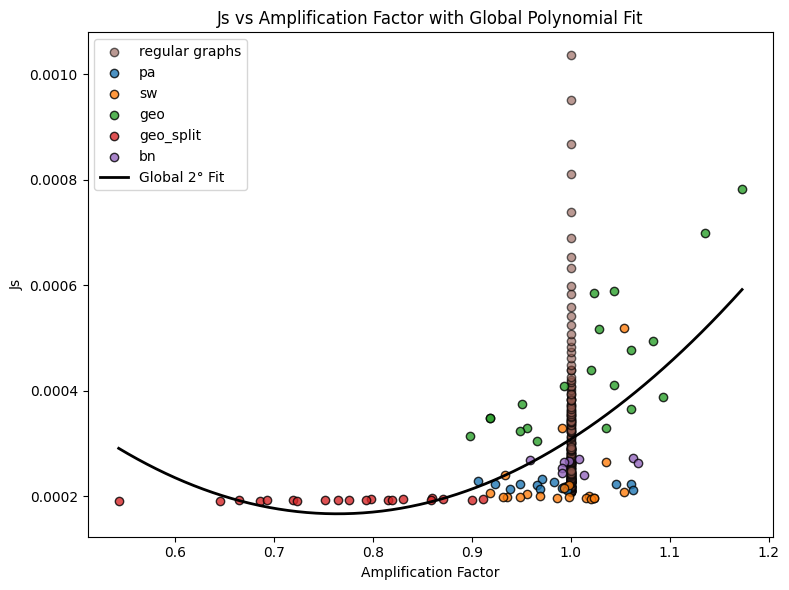

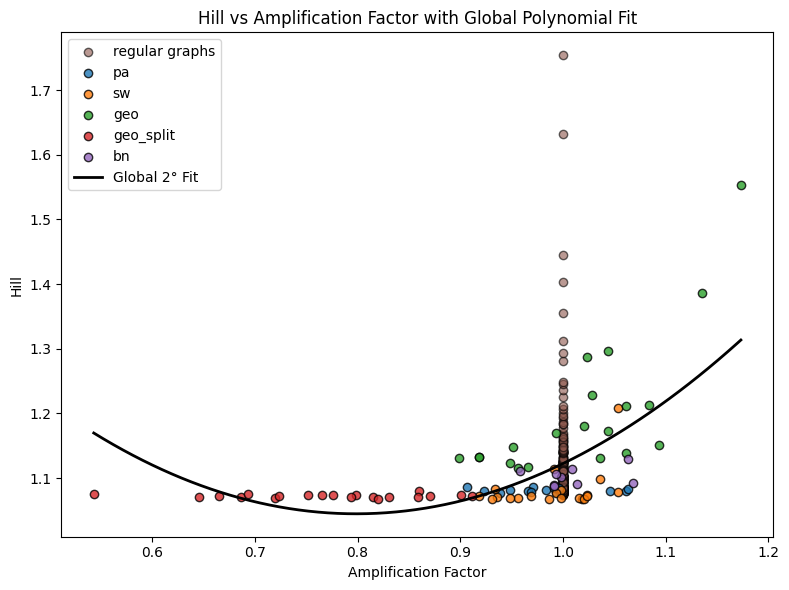

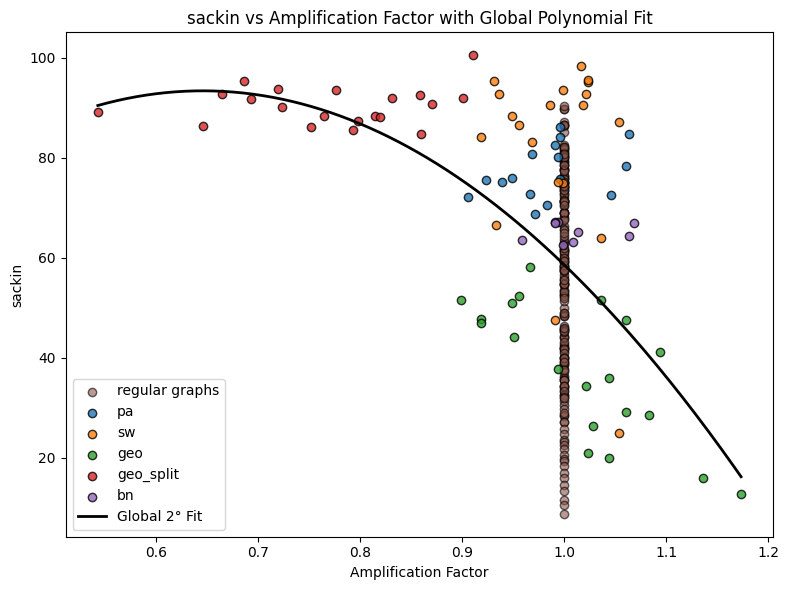

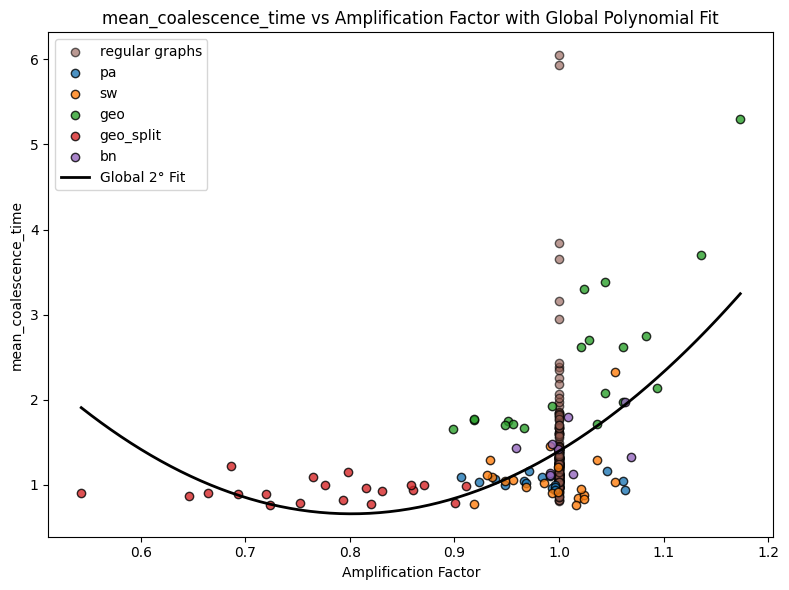

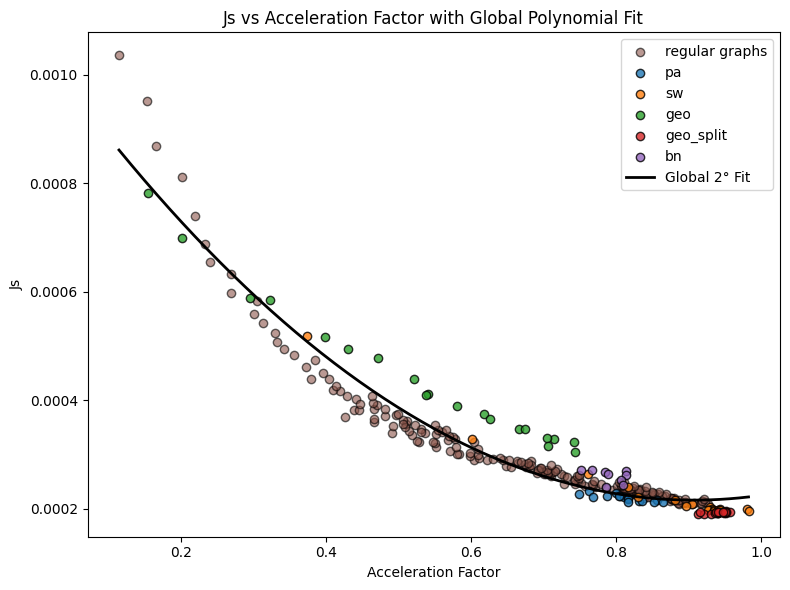

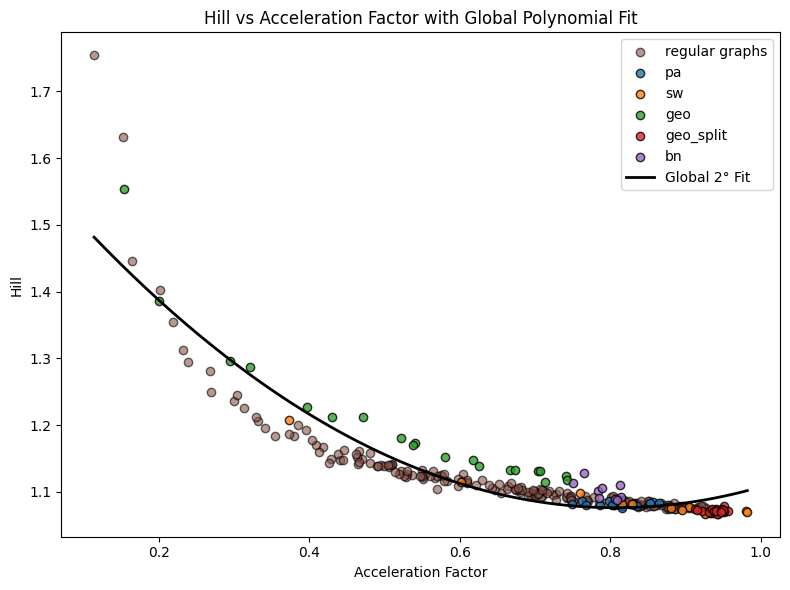

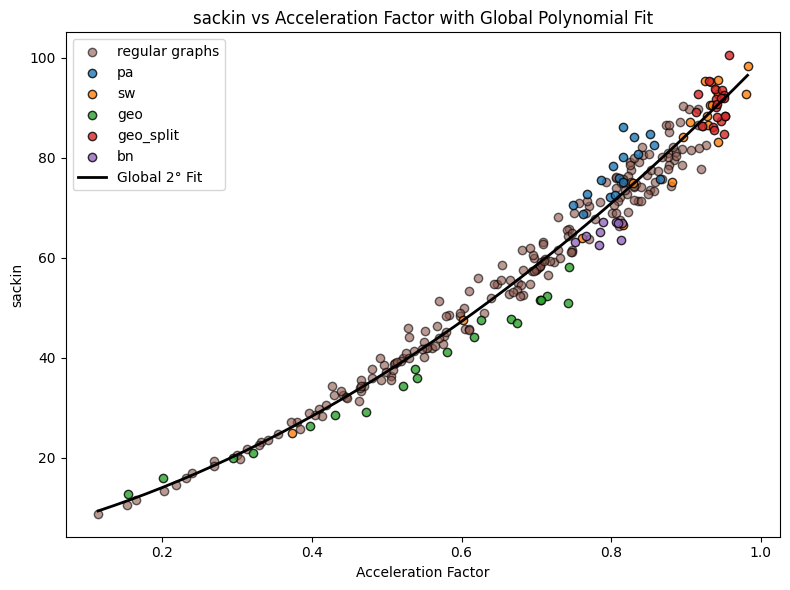

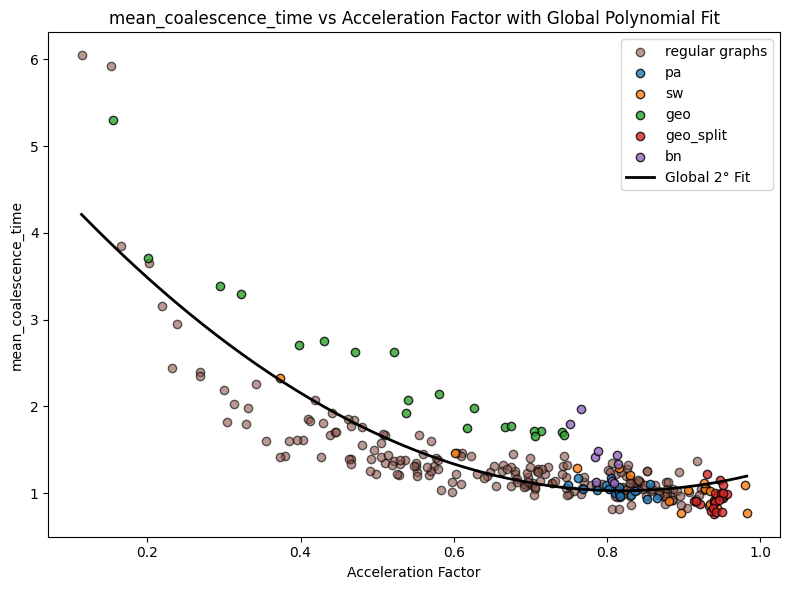

LinAlgError: SVD did not converge in Linear Least Squares

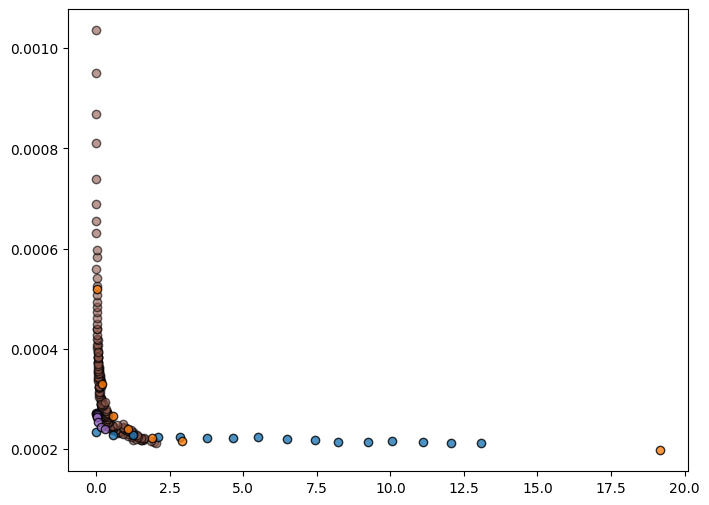

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_vars = ["amp", "acc", "AlgebraicConnectivity"]
y_vars = ["Js", "Hill", "sackin", "mean_coalescence_time"]
x_labels = {"amp": "Amplification Factor", "acc": "Acceleration Factor", "AlgebraicConnectivity": "Algebraic Connectivity"}

graph_families = ['pa', 'sw', '3_regular', '4_regular', '6_regular', '10_regular', 'geo', 'geo_split', 'bn']
regular_graphs = ['3_regular', '4_regular', '6_regular', '10_regular']

palette = sns.color_palette("tab10")
color_mapping = {}

non_regular_graphs = [g for g in graph_families if g not in regular_graphs]
for i, g in enumerate(non_regular_graphs):
    color_mapping[g] = palette[i]
regular_color = palette[len(non_regular_graphs)]
for g in regular_graphs:
    color_mapping[g] = regular_color

poly_degree = 2  # Polynomial degree

for x in x_vars:
    for y in y_vars:
        plt.figure(figsize=(8, 6))
        plotted_labels = set()

        # Plot regular graphs first (background)
        for g in regular_graphs:
            subset = data[data['graph'] == g]
            label = 'regular graphs' if 'regular graphs' not in plotted_labels else None
            plt.scatter(subset[x], subset[y], label=label, color=color_mapping[g], alpha=0.6, edgecolor='k')
            plotted_labels.add('regular graphs')

        # Plot non-regular graphs on top
        for g in non_regular_graphs:
            subset = data[data['graph'] == g]
            plt.scatter(subset[x], subset[y], label=g, color=color_mapping[g], alpha=0.8, edgecolor='k')

        # Safe global fit
        x_data = data[x].dropna()
        y_data = data[y].dropna()
        if len(x_data) >= poly_degree + 1:
            try:
                coeffs = np.polyfit(x_data, y_data, poly_degree)
                poly = np.poly1d(coeffs)
                x_range = np.linspace(x_data.min(), x_data.max(), 200)
                plt.plot(x_range, poly(x_range), color='black', linestyle='-', linewidth=2, label=f'Global {poly_degree}° Fit')
            except np.linalg.LinAlgError:
                print(f"Skipped global fit for {y} vs {x} due to numerical issues.")

        plt.xlabel(x_labels.get(x, x))
        plt.ylabel(y)
        plt.legend()
        plt.title(f'{y} vs {x_labels.get(x, x)} with Global Polynomial Fit')
        plt.tight_layout()
        plt.show()
